# Decision Trees

## Author - Rodolfo Lerma

# Problem:
Using the WI_Breast_Cancer csv file, create a new notebook to build a decision tree classifier that would be able to detect whether a tumor is benign or malignant.

# Abstract:
Rooney's client is a tech-manufacturing startup working on a number of automated detection devices for the medical and construction industries. Among the auto-detection devices is a reader that looks at possible carcinoma tissue samples to classify the sample as either benign or malignant. Rooney asks you for help in developing a better algorithm than the current classifier, perhaps a decision tree can help.

### Data exploration.
- **Data Cleaning**
- **Visual Exploration of the Target Variable: `class`**
- **Visual Exploration of the Other Variable.**


### Feature Selection.
- **Correlation**
- **Mutual Information**
- **Stepwise Model Selection**
- **LASSO**


### Evaluation/Selection of features.
- **Class imbalace**
- **Evaluation of options**


### Decision Tree Method.
- **Hyperparameter Settings Comparison**
    - Choosing the best hyperparameters for `entropy`.
    - Choosing the best hyperparameters for `gini`.
- **Comparison between Models (`entropy` & `gini`).**
    - Visualize Confusion Matrix.
        - Entropy Confusion Matrix
        - Gini Confusion Matrix
    - Visualize Decision Tree.    
- **Performance Comparison.**

### Summary/Conclusions.

# Data exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'WI_Breast_Cancer.csv'
df = pd.read_csv(filename, header = None)
#Names based on the information provided by the website
df.columns = ['id', 'class', 'clump', 'cell_size','cell_shape', 'adhesion', 'epithelial_size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']

In [3]:
df.head()

,id,class,clump,cell_size,cell_shape,adhesion,epithelial_size,nuclei,chromatin,nucleoli,mitosis
0,1000025,2,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,1002945,2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,1015425,2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,1016277,2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,1017023,2,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1


In [4]:
df.shape

(709, 11)

In [5]:
df.dtypes

id                  object
class               object
clump              float64
cell_size          float64
cell_shape         float64
adhesion           float64
epithelial_size    float64
nuclei             float64
chromatin          float64
nucleoli           float64
mitosis             object
dtype: object

It seems that there are some rows in the `id`, `class` & `mitosis` columns with some incorrect data

In [6]:
df['class'].unique()

array(['2', '4', nan, ' 1990; Updated Jan 8'], dtype=object)

In [7]:
df['id'].unique()

array(['1000025', '1002945', '1015425', '1016277', '1017023', '1017122',
       '1018099', '1018561', '1033078', '1035283', '1036172', '1041801',
       '1043999', '1044572', '1047630', '1048672', '1049815', '1050670',
       '1050718', '1054590', '1054593', '1056784', '1057013', '1059552',
       '1065726', '1066373', '1066979', '1067444', '1070935', '1071760',
       '1072179', '1074610', '1075123', '1079304', '1080185', '1081791',
       '1084584', '1091262', '1096800', '1099510', '1100524', '1102573',
       '1103608', '1103722', '1105257', '1105524', '1106095', '1106829',
       '1108370', '1108449', '1110102', '1110503', '1110524', '1111249',
       '1112209', '1113038', '1113483', '1113906', '1115282', '1115293',
       '1116116', '1116132', '1116192', '1116998', '1117152', '1118039',
       '1120559', '1121732', '1121919', '1123061', '1124651', '1125035',
       '1126417', '1131294', '1132347', '1133041', '1133136', '1136142',
       '1137156', '1143978', '1147044', '1147699', 

From the couple of examples above it is possible to notice that between the lines we have some headlines dividing the groups of data that form part of the Data Set. That needs to be removed.

## Data Cleaning

As explore above there are some headlines in between rows that need to be removed. In the code below these lines are going to be selected and then the rows for those lines will be dropped. 

In [8]:
contain_values = df[df['id'].str.contains('#')]
x = contain_values.iloc[:,0].index
index_data = x.tolist()
df = df.drop(df.index[index_data])
df = df.dropna()

In [9]:
df["mitosis"] = df['mitosis'].astype(float)
df["class"] = df['class'].astype(float)

In [10]:
df.dtypes

id                  object
class              float64
clump              float64
cell_size          float64
cell_shape         float64
adhesion           float64
epithelial_size    float64
nuclei             float64
chromatin          float64
nucleoli           float64
mitosis            float64
dtype: object

In [11]:
df.shape

(699, 11)

As seen in the number above the Data Frame went from 709 to 699, which coincides with the headlines that needed to be removed.

### Visual Exploration of the Target Variable: `class`

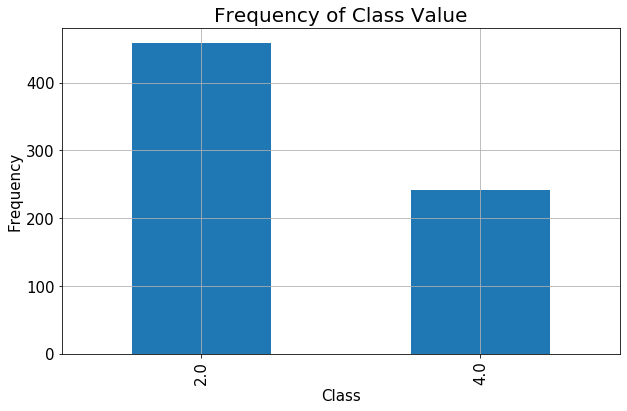

In [12]:
df['class'].value_counts().plot(kind='bar',figsize = (10,6))
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Frequency of Class Value', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [13]:
df['class'].value_counts()

2.0    458
4.0    241
Name: class, dtype: int64

As noted in the website from this dataset class 4 is to identify a malignant tumor and class 2 for a benign one. From the plot and numbers above we see that there is a small class imbalance as the class 4.0 is little bit more than half of the class 2.0.

### Visual Exploration of the Other Variable: 

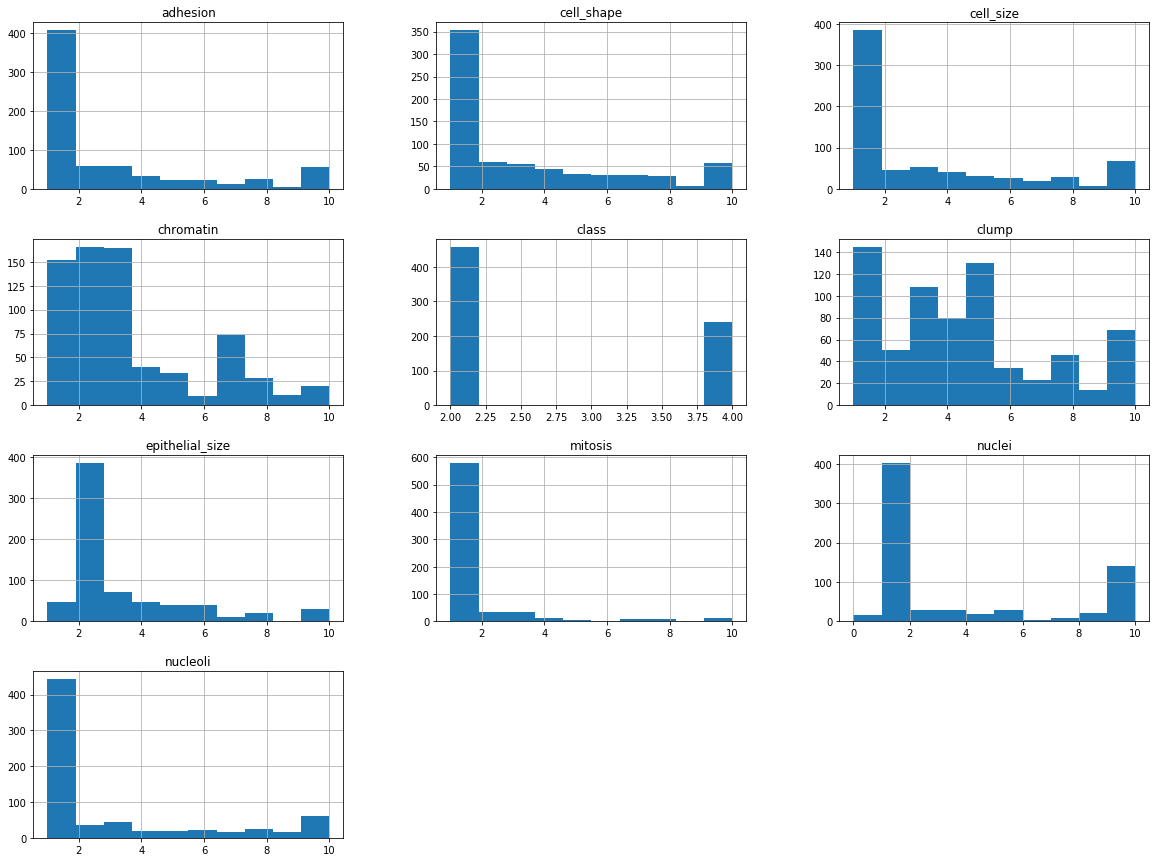

In [14]:
numerical = ['class', 'clump', 'cell_size','cell_shape', 'adhesion', 'epithelial_size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
df_numeric = df[numerical]

df.hist(figsize = (20,15))
plt.show()

# Feature selection

From the data noted above it seems that all variables with the exception of `id` might be relevant to the model. Then for the feature selection of the model we will focus on the following variables:
- `class`
- `clump`
- `cell_size`
- `cell_shape`
- `adhesion`
- `epithelial_size`
- `nuclei` 
- `chromatin`
- `nucleoli`
- `mitosis`


## Correlation

In [15]:
correlations_df = df_numeric.corr()
df_correlations = correlations_df['class']
df_correlations = pd.DataFrame(data=df_correlations)
df_correlations['Corr_Abs'] = abs(df_correlations['class'])

min_corr = min(df_correlations['Corr_Abs'])
max_corr = max(df_correlations['Corr_Abs'][1:])
print('Max correlation value is = ' + str(round(max_corr, 4)))
print('Min correlation value is = ' + str(round(min_corr, 4)))

#list: High correlation and low correlation
df_correlations.reset_index(inplace=True)
high_correlated_features = []
low_correlated_features = []
for i in range(len(df_correlations['Corr_Abs'])):
    p = df_correlations.iloc[i,2]
    if p >= 0.5:
        l = df_correlations.iloc[i,0]
        high_correlated_features.append(l)
    else:
        r = df_correlations.iloc[i,0]
        low_correlated_features.append(r)
        
high_correlated_features.remove('class')
len_corr = len(high_correlated_features)
print('# of Features using Correlation: ' + str(len_corr))

Max correlation value is = 0.8189
Min correlation value is = 0.4232
# of Features using Correlation: 8


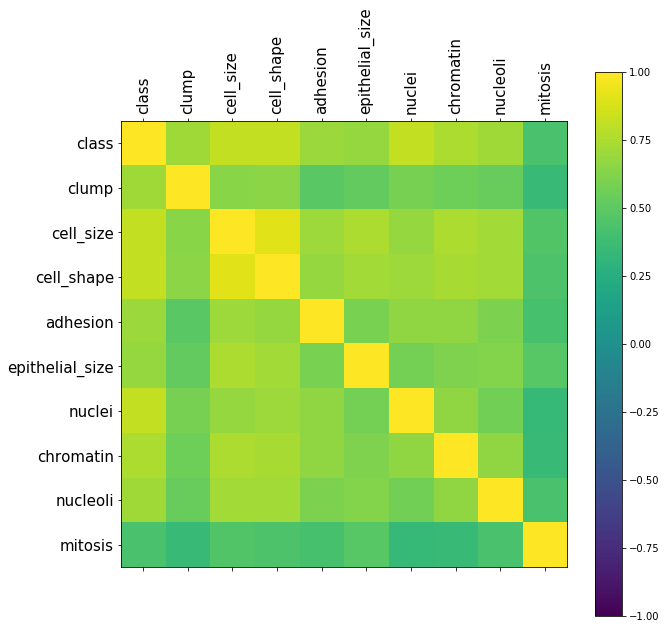

In [16]:
# plot correlation matrix
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_df, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical,rotation = 90)
ax.set_yticklabels(numerical)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.show()

It seems that `mitosis` is the feature that offers the lowest of the Correlation coefficient, but yet that coefficient being at least around 0.5.

## Mutual Information

In [17]:
from sklearn.metrics import mutual_info_score
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

mutual_values = []
for i in range(len(df_numeric.iloc[1])):
    X = df_numeric.iloc[:,i].tolist()
    Y = df_numeric.iloc[:,0].tolist()
    mi = calc_MI(X, Y, 20)
    mutual_values.append(mi)
my_list_mutual = df_numeric.columns.values.tolist()    
mutual_info_dict = dict(zip(my_list_mutual, mutual_values))
mutual_info_dict_sorted = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse = True)
df_correlations['Mutual_info'] = mutual_values

min_mi = min(df_correlations['Mutual_info'])
max_mi = max(df_correlations['Mutual_info'][1:])

print('Max mi value is = ' + str(round(max_mi, 4)))
print('Min mi value is = ' + str(round(min_mi, 4)))

#List: High mi and low mi
high_mi_features = []
low_mi_features = []
for i in range(len(df_correlations['Mutual_info'])):
    w = df_correlations.iloc[i,3]
    if w >= 0.1:
        q = df_correlations.iloc[i,0]
        high_mi_features.append(q)
    else:
        k = df_correlations.iloc[i,0]
        low_mi_features.append(k)
high_mi_features.remove('class')
len_mi = len(high_mi_features)
print('# of Features using MI: ' + str(len_mi))

Max mi value is = 0.4743
Min mi value is = 0.1456
# of Features using MI: 9


## Stepwise Model Selection

In [18]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, 20, step=1)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [19]:
df_numeric_copy = df_numeric.copy()

target = df_numeric.iloc[:,0]#This is the selection of the Target Variables
df_updated = df_numeric_copy.drop('class', axis='columns')

lol = df_updated.values.tolist()
selector = selector.fit(lol, target)

boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)
        
len_selected = len(selected_features)
print('# of Features using BACKWARD: ' + str(len_selected))

# of Features using BACKWARD: 9


## LASSO

In [20]:
# LASSO
from sklearn import linear_model
alpha = 0.001 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

clf.fit(lol, target)
lasso_coef = clf.coef_
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)
        
len_lasso = len(lasso_features)
print('# of Features using LASSO: ' + str(len_lasso))

Sum of square of coefficients = 0.02
# of Features using LASSO: 9


# Evaluation/Selection of features

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors

#List for Classifiers and Names
header = ["K_Nearest_Neighbors"]
V = [knn]

tr = df.iloc[:,1].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b == 4: #Malign tumor
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

## Class imbalace

In [22]:
#Split the data for variables with high mi value
label = df['target_binomial']
correlation_variables = df[high_correlated_features]
mi_variables = df[high_mi_features]
stepwise_variables = df[selected_features]
lasso_variables = df[lasso_features]

In [23]:
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(mi_variables, label, test_size=0.30, random_state=42)
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(stepwise_variables, label, test_size=0.30, random_state=42)
X_train_la, X_test_la, y_train_la, y_test_la = train_test_split(lasso_variables, label, test_size=0.30, random_state=42)

In [24]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors

#List for Classifiers and Names
header = ["K_Nearest_Neighbors"]
V = [knn]

tr = df.iloc[:,1].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b == 4: #Malign tumor
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

In [25]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [26]:
sm = SMOTE(random_state=42)
variables_mi_sm, label_mi_sm = sm.fit_resample(mi_variables, label)
variables_sp_sm, label_sp_sm = sm.fit_resample(stepwise_variables, label)
variables_la_sm, label_la_sm = sm.fit_resample(lasso_variables, label)

#Split the data
X_train_mi_sm, X_test_mi_sm, y_train_mi_sm, y_test_mi_sm = train_test_split(variables_mi_sm, label_mi_sm, test_size=0.30, random_state=42)
X_train_sp_sm, X_test_sp_sm, y_train_sp_sm, y_test_sp_sm = train_test_split(variables_sp_sm, label_sp_sm, test_size=0.30, random_state=42)
X_train_la_sm, X_test_la_sm, y_train_la_sm, y_test_la_sm = train_test_split(variables_la_sm, label_la_sm, test_size=0.30, random_state=42)

In [27]:
#unction to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    #print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    #print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    #print (" ")
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        allvalues = [AR, ER, P, R, F1]
    return allvalues

## Evaluation of options

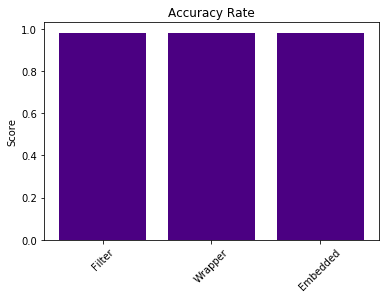

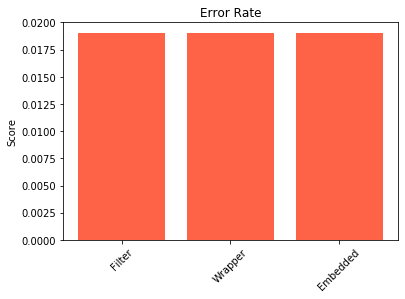

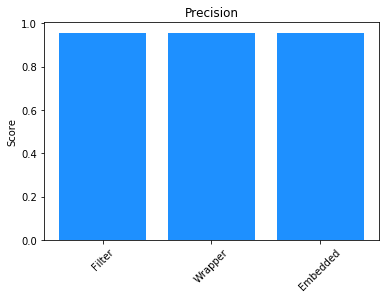

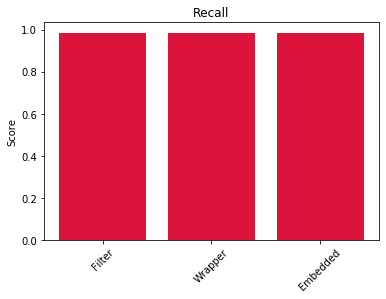

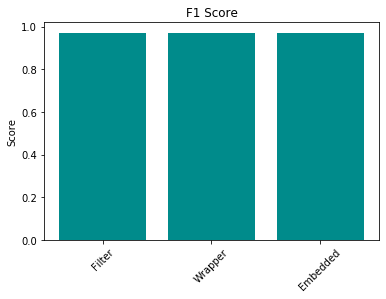

In [28]:
filters = classifier_performance(V, header, X_train_mi_sm, X_test_mi, y_train_mi_sm, y_test_mi)
wrappers = classifier_performance(V, header, X_train_sp_sm, X_test_sp, y_train_sp_sm, y_test_sp)
embedded = classifier_performance(V, header, X_train_la_sm, X_test_la, y_train_la_sm, y_test_la)

comparison_list = [filters,wrappers,embedded]
names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
header = ["Filter","Wrapper","Embedded"]    
#Plots of each of the Performance Values for each of the Classifiers in this analysis
for i in range(len(names)):
    x = [item[i] for item in comparison_list]
    plt.bar(header, x, color=colors[i])
    plt.xticks(rotation=45)
    plt.title(names[i])
    plt.ylabel("Score")
    plt.show()

From this quick analysis using Filter, Wrapper & Embedded Feature Selections Methods it seems that all variables are relevant enought to include in the model. By all variables I mean all except `id` as not a lot of value is added to the model by adding the identification label.

# Decision Tree Method

## Hyperparameter Settings Comparison

Based on the online documentation for this sklearn function, there are at least 13 parameters that can be modified when working with the `DecisionTreeClassifier` function. For simplicity reason only 2 of those are going to be explore here:
- `max_depth`
- `min_samples_split`

### Choosing the best hyperparameters for `entropy`

In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

max_depth_options = [2,3,4,5,6,7,8,9,10,11,12]
min_sample_options = [2,3,4,5,6,7,8,9,10,11,12]

#Create a Grid

dt_grid = {'max_depth': max_depth_options,
               'min_samples_split': min_sample_options}

dtc_base_entropy = DecisionTreeClassifier(criterion='entropy')

dt_random_entropy = RandomizedSearchCV(estimator = dtc_base_entropy, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
dt_random_entropy.fit(X_train_la_sm, y_train_la_sm)

dt_random_entropy.best_params_

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 121 is smaller than n_iter=200. Running 121 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 121 candidates, totalling 363 fits


{'min_samples_split': 4, 'max_depth': 6}

### Choosing the best hyperparameters for `gini`

In [30]:
dtc_base_gini = DecisionTreeClassifier(criterion='gini')

dt_random_gini = RandomizedSearchCV(estimator = dtc_base_gini, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
dt_random_gini.fit(X_train_la_sm, y_train_la_sm)

dt_random_gini.best_params_

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 121 is smaller than n_iter=200. Running 121 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 121 candidates, totalling 363 fits


{'min_samples_split': 7, 'max_depth': 6}

## Comparison between Models (`entropy` & `gini`)

From the code above it is possible to see the best combination of values for the hyperparameters analyzed for each model. Using that information the accuracy of each model is going to be analyzed next.

In [31]:
# Use entropy = no limit on samples for split
dtc_ent = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_split = 4).fit(X_train_la_sm, y_train_la_sm) 
y_dtc_ent_pred = dtc_ent.predict(X_test_la)

# Use information gain (default) limit min_samples to 4
dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth = 6, min_samples_split = 5).fit(X_train_la_sm, y_train_la_sm)
y_dtc_gini_pred = dtc_gini.predict(X_test_la)

In [32]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test_la, y_dtc_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test_la, y_dtc_gini_pred)*100))

Entropy accuracy is : 96.19047619047619%
Gini accuracy is : 97.61904761904762%


### Visualize Confusion Matrix

**Entropy Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test_la, y_dtc_ent_pred),
    columns=['Predicted Malignant', 'Predicted Benign'],
    index=['True Malignant', 'True Benign'],
)

,Predicted Malignant,Predicted Benign
True Malignant,63,4
True Benign,4,139


**Gini Confusion Matrix**

In [34]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test_la, y_dtc_gini_pred),
    columns=['Predicted Malignant', 'Predicted Benign'],
    index=['True Malignant', 'True Benign'],
)

,Predicted Malignant,Predicted Benign
True Malignant,66,1
True Benign,4,139


### Visualize Decision Tree

[Text(586.5340909090909, 1261.9285714285713, 'cell_size <= 2.022\nentropy = 0.999\nsamples = 641\nvalue = [329, 312]\nclass = class'),
 Text(253.63636363636363, 1067.7857142857142, 'epithelial_size <= 3.5\nentropy = 0.184\nsamples = 287\nvalue = [8, 279]\nclass = clump'),
 Text(126.81818181818181, 873.6428571428571, 'clump <= 6.5\nentropy = 0.035\nsamples = 269\nvalue = [1, 268]\nclass = clump'),
 Text(63.40909090909091, 679.5, 'entropy = 0.0\nsamples = 268\nvalue = [0, 268]\nclass = clump'),
 Text(190.22727272727272, 679.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = class'),
 Text(380.45454545454544, 873.6428571428571, 'class <= 5.5\nentropy = 0.964\nsamples = 18\nvalue = [7, 11]\nclass = clump'),
 Text(317.0454545454545, 679.5, 'cell_shape <= 2.5\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]\nclass = clump'),
 Text(253.63636363636363, 485.3571428571429, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = clump'),
 Text(380.45454545454544, 485.3571428571429, 'nucleoli <= 

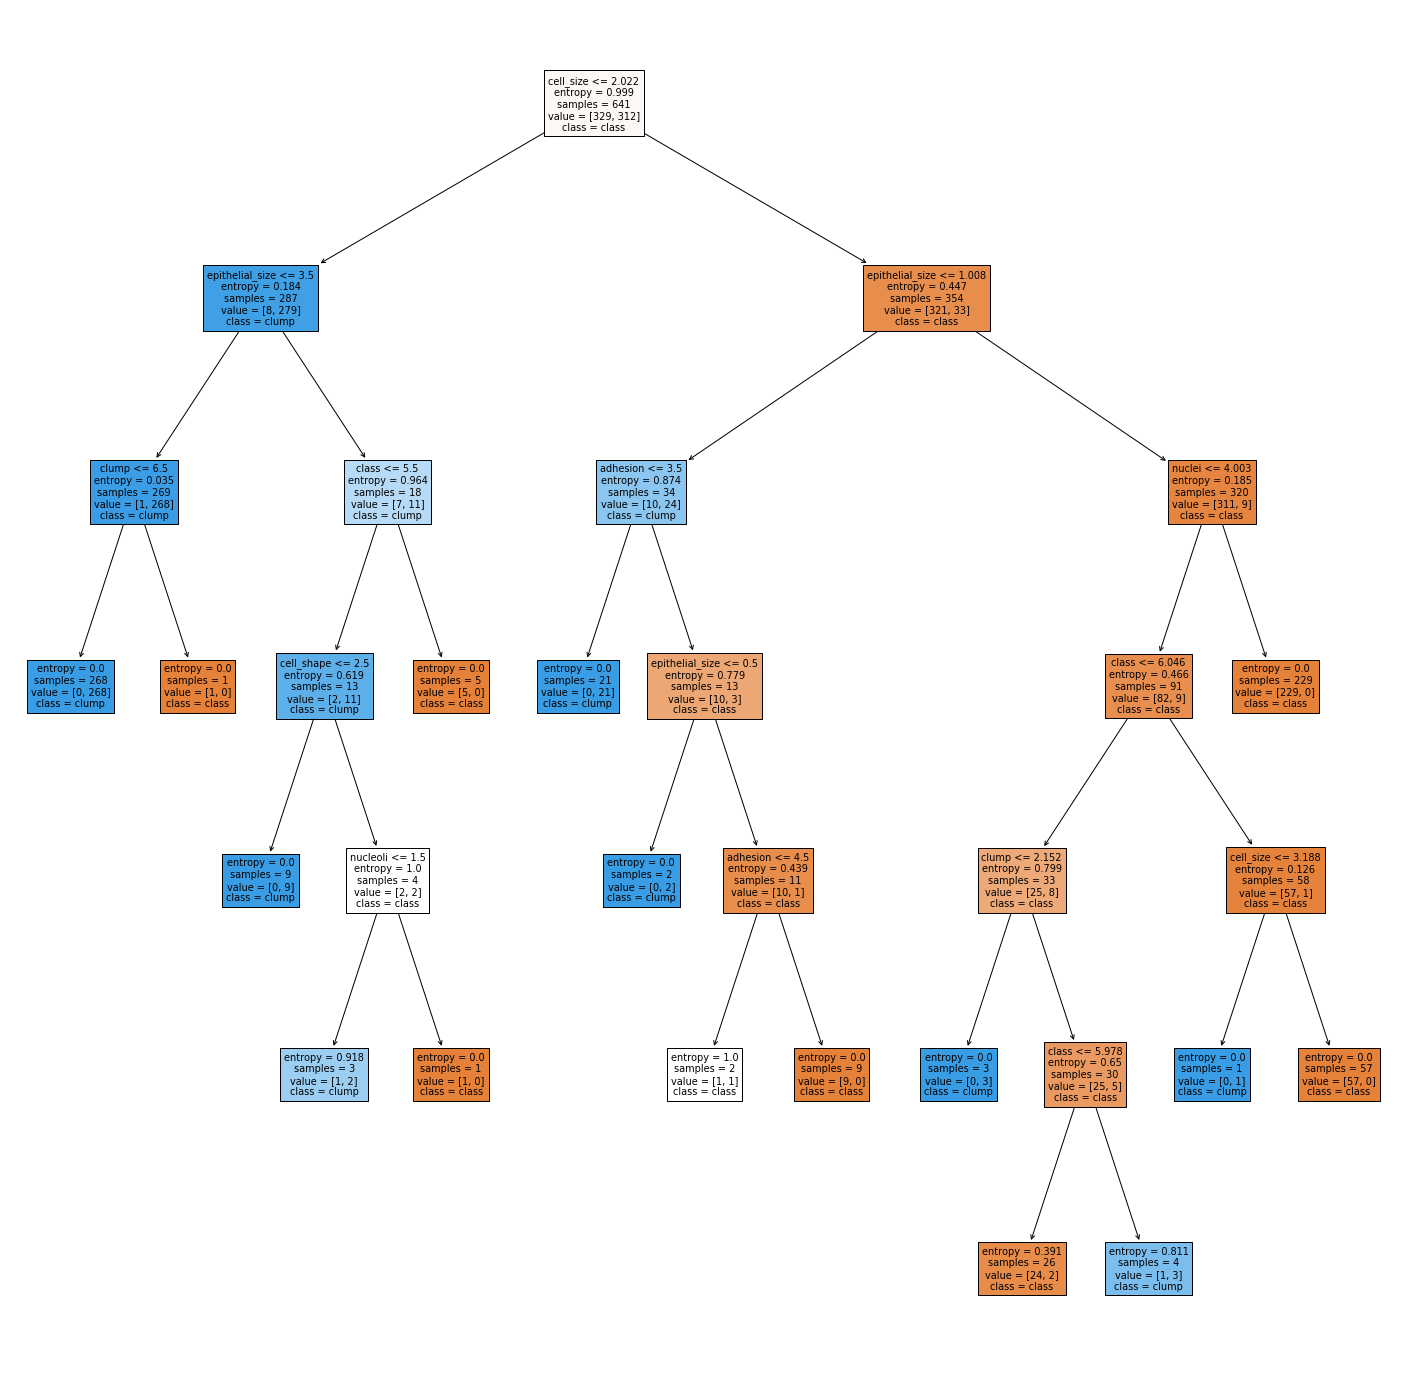

In [35]:
#create a visualization of the tree 
from sklearn import tree
import matplotlib.pyplot as plt

columns = list(df_numeric)

#This code differs from the video where it is using graphviz for visualizing the trees. Instead we will use plot_tree method
#from Sklean instead for it's simplicity.
fig = plt.figure(figsize=(25,25)) 
tree.plot_tree(dtc_ent,
                   feature_names=columns,  
                   class_names=columns,
                   filled=True)

[Text(558.0, 1261.9285714285713, 'cell_size <= 2.022\ngini = 0.5\nsamples = 641\nvalue = [329, 312]\nclass = class'),
 Text(279.0, 1067.7857142857142, 'epithelial_size <= 5.5\ngini = 0.054\nsamples = 287\nvalue = [8, 279]\nclass = clump'),
 Text(167.39999999999998, 873.6428571428571, 'nucleoli <= 9.0\ngini = 0.021\nsamples = 281\nvalue = [3, 278]\nclass = clump'),
 Text(111.6, 679.5, 'epithelial_size <= 3.5\ngini = 0.014\nsamples = 280\nvalue = [2, 278]\nclass = clump'),
 Text(55.8, 485.3571428571429, 'gini = 0.0\nsamples = 268\nvalue = [0, 268]\nclass = clump'),
 Text(167.39999999999998, 485.3571428571429, 'class <= 5.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = clump'),
 Text(111.6, 291.2142857142858, 'adhesion <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = clump'),
 Text(55.8, 97.07142857142867, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = class'),
 Text(167.39999999999998, 97.07142857142867, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = clump'),


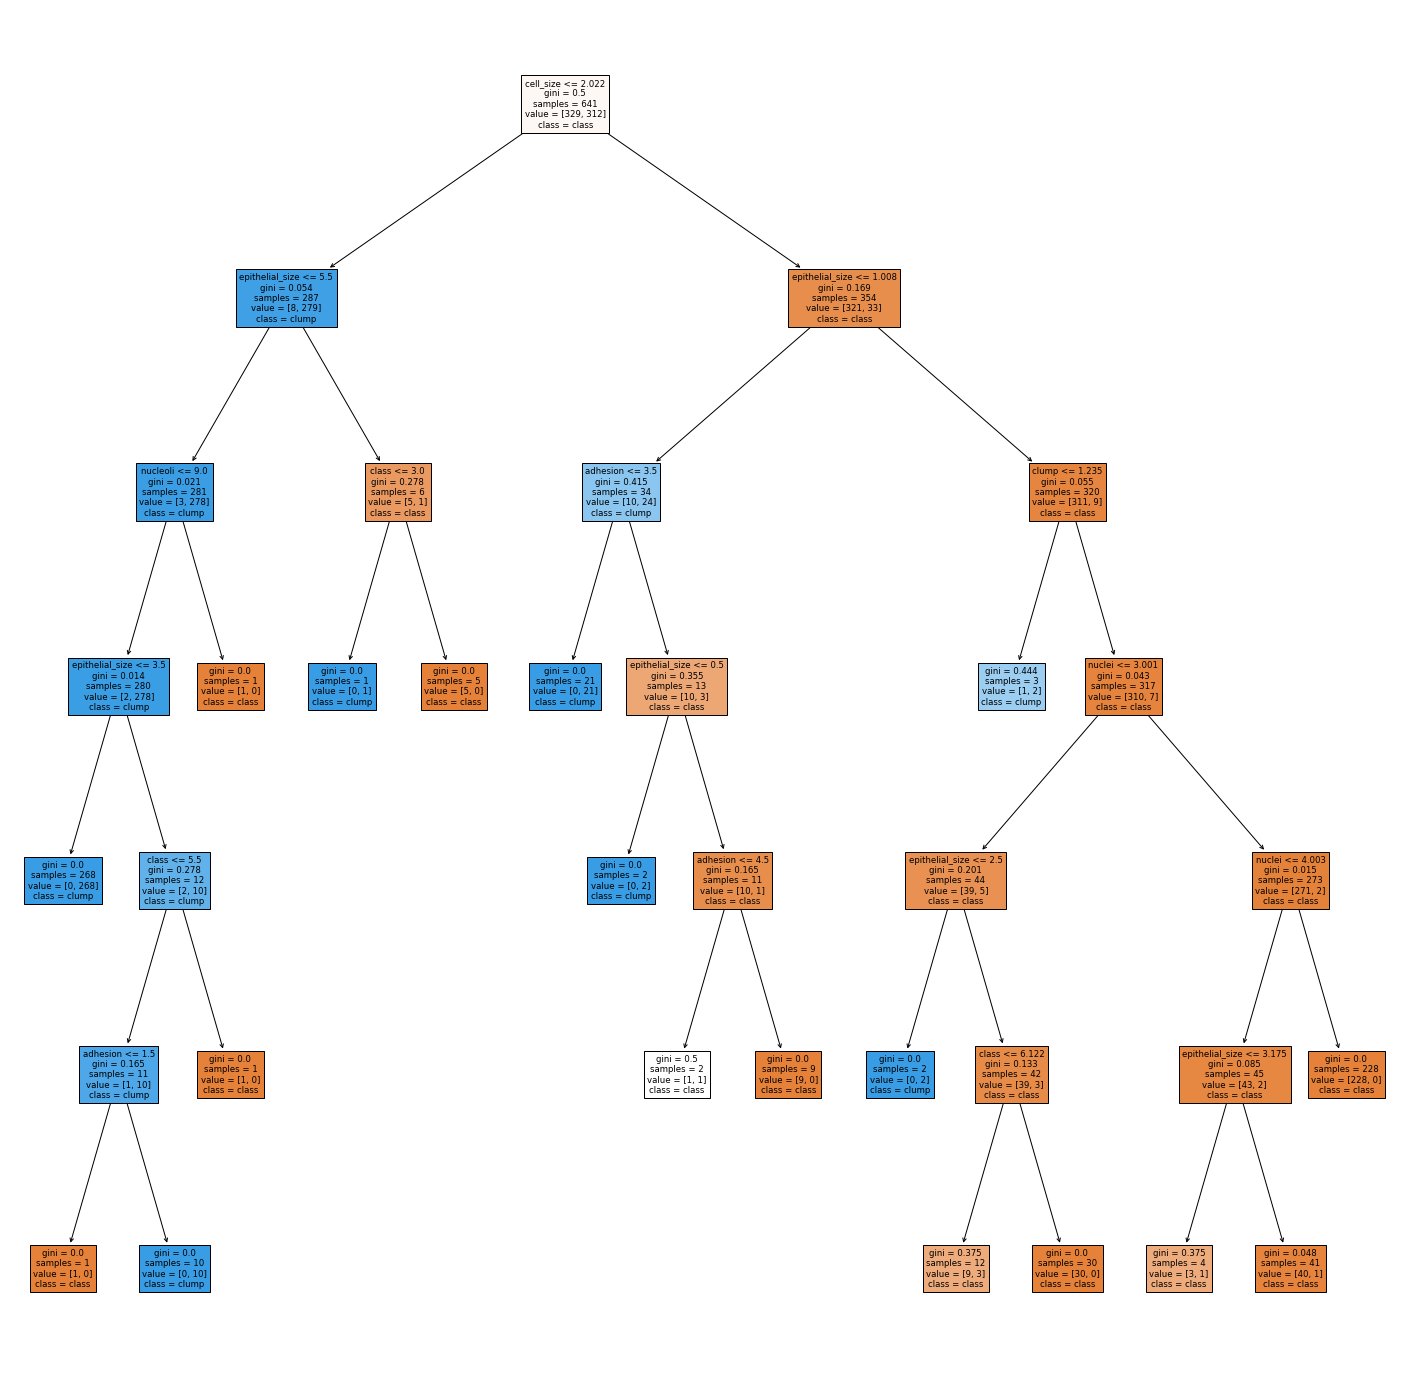

In [36]:
fig = plt.figure(figsize=(25,25)) 
tree.plot_tree(dtc_gini,
                   feature_names=columns,  
                   class_names=columns,
                   filled=True)

As it is possible to see from the couple of plots above there are small differences in the way each model is selecting the features for the different branches. But they share a lot of similarities.

## Performance Comparison

In [37]:
#Classifiers
dte = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_split = 7)
dtg = DecisionTreeClassifier(criterion='gini', max_depth = 6, min_samples_split = 3)

#List for Classifiers and Names
header = ["Decision_Tree_Entropy","Decision_Tree_Gini"]
V = [dte, dtg]

In [38]:
from sklearn.metrics import *
def ROM_plots(T,y):
    # ROC analysis
    LW = 2.0 # line width for plots
    LL = "lower right" # legend location
    LC = 'orange' # Line Color
    fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    #print ("\nTP rates:", np.round(tpr, 2))
    #print ("\nFP rates:", np.round(fpr, 2))
    #print ("\nProbability thresholds:", np.round(th, 2))
    plt.figure()
    plt.title('Receiver Operating Characteristic curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPT')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
    plt.legend(loc=LL)
    plt.show()
    print ("\nAUC score (using auc function):", np.round(AUC, 2))
    print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")

#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("\n\n#############\Classifier: #############\n", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        ROM_plots(T,y)
    
    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['lightseagreen', 'tomato', 'darkmagenta', 'crimson', 'olive']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()



#############\Classifier: #############
 Decision_Tree_Entropy

Accuracy: 0.9619 ,Error Rate: 0.0381 ,Precision: 0.9403 ,Recall: 0.9403 ,F1 Score: 0.9403


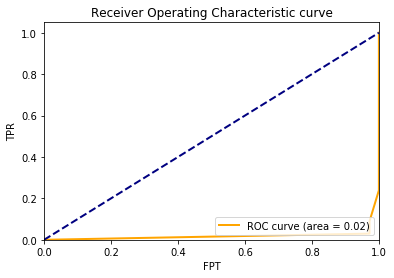


AUC score (using auc function): 0.02

AUC score (using roc_auc_score function): 0.02 



#############\Classifier: #############
 Decision_Tree_Gini

Accuracy: 0.9714 ,Error Rate: 0.0286 ,Precision: 0.942 ,Recall: 0.9701 ,F1 Score: 0.9559


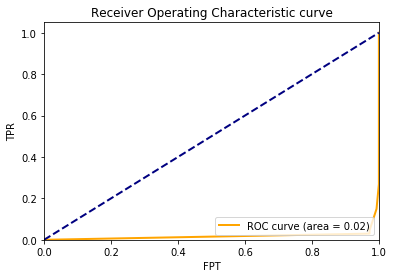


AUC score (using auc function): 0.02

AUC score (using roc_auc_score function): 0.02 



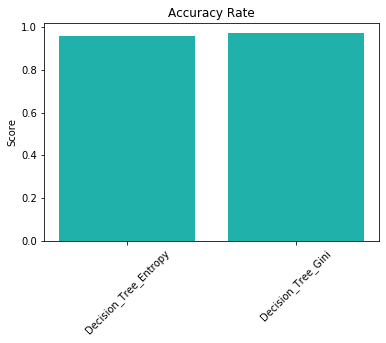

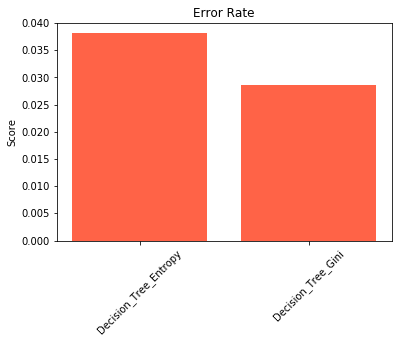

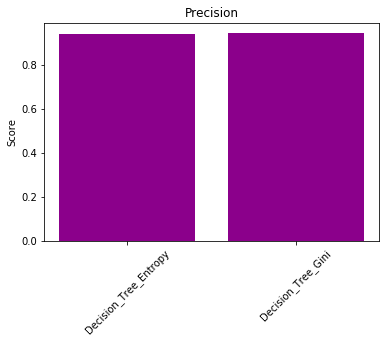

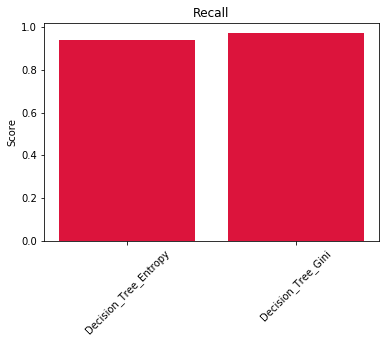

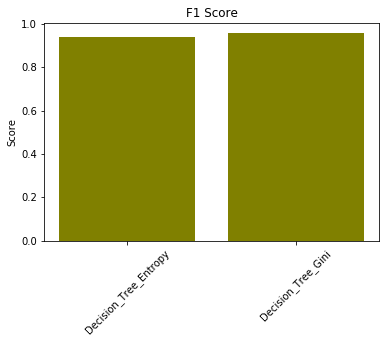

In [39]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train_la_sm, X_test_la, y_train_la_sm, y_test_la)

From the comparison plots above it is possible to see that the `gini` coefficient does a little bit better than the `entropy` coeffiecient almost in all the performance values, except for the AUC for in which the `entropy` coefficient got a better value. Now the values are so low that it is likely an issue with the model rather than an actual difference.

# Summary/Conclusions.


**Test both entropy and the gini coefficient. Which performs better and why?** <br>
From the analysis above it was possible to see that the `gini` Coefficient perform a little better in almost all the performance values compared to the `entropy` coefficient.

| Coefficient | Accuracy |
| - | - |
| entropy | 96.6% |
| gini | 97.62% |



**What are the best hyperparameter settings for both?**<br>
Based on the online documentation for this sklearn function, there are at least 13 parameters that can be modified when working with the `DecisionTreeClassifier` function. For simplicity reason only 2 were explored for this analysis:
- `max_depth`
- `min_samples_split`

And the best values for each were:

| Coefficient | max_depth | min_samples_split |
| - | - | - |
| entropy | 6| 4 |
| gini | 6 | 5 |


**Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?**<br>
As it is possible to see from the couple of plots above there are small differences in the way each model is selecting the features for the different branches. But they share a lot of similarities.
Both models start with `cellsize` as the main feature and in the next level both have `epithelial_size` as the next level feature, but from that moment forward the next levels are slighly different.



**Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?**<br>
The precision and recal values are as follows:

| Coefficient | Precision | Recall |
| - | - | - |
| entropy | 0.9538 | 0.9254 |
| gini | 0.9429 | 0.9851 |

In this case since I would think that we want to minimize false negatives, meaning we want to minimize people that were diagnosed as healthy were in reality were sick, for that reason I believe that **precision** would be the metric to maximize.

**What are the implications of using this type of machine learning algorithm for breast cancer analysis?**<br>
   - One of the implications of this method, in this particular case would be that the model will predict an either/or result. Either the tumor is benign or malignant but not a degree in which we can determine if it is benign how close it is to be malignant (if that is possible) or if it is malignant how agressive it is.
   - Another implication of using this ML algorithm is the limitation of the number of features, even though this is true for most of the ML algorithms it is specialy notorious for Decision Trees. And this might be a problem as more features may need to be explore as potential predictors for breast cancer.
